# Supervised CARE Training

Here we use CARE training using noisy images as input and averaged noisy images as target.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../../')
from unet.model import UNet
from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from https://zenodo.org/record/5156960/files/Mouse%20skull%20nuclei.zip?download=1. Here we show the pipeline for Mouse skull nuclei dataset. Load the appropriate dataset at an appropriate path. For us, the path is data folder which exists at `../../../`. For Mouse skull nuclei, the data to be denoised is named ```example2_digital_offset300.tif```. 

In [2]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data/Mouse skull nuclei'):
    os.mkdir('../../../data/Mouse skull nuclei')

zipPath="../../../data/Mouse_skull_nuclei.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve(' https://zenodo.org/record/5156960/files/Mouse%20skull%20nuclei.zip?download=1', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data/Mouse skull nuclei")


### Load Data
#### Ensure ```filename = example2_digital_offset300.tif``` and specify the ```dataname```  

In [3]:
path='../../../data/Mouse skull nuclei/'
fileName='example2_digital_offset300.tif'
dataName='mouseskullnuclei' # This will be used to name the care model

#### Noisy Data (Input to network)

In [4]:
data=imread(path+fileName)
nameModel=dataName+'_care'

#### Ground truth Data (Target of Network)

In [5]:
dataGT = np.mean(data, axis=0)[np.newaxis,...,np.newaxis]

In [6]:
data=data[...,np.newaxis]
dataGT = np.repeat(dataGT, 200, axis=0)
print("Shape of Raw Noisy Image is ", data.shape, "; Shape of Target Image is ", dataGT.shape)
data = np.concatenate((data,dataGT),axis=-1)
# Add the target image as a second channel to `data`
print("Shape of `data` is ", data.shape)

Shape of Raw Noisy Image is  (200, 512, 512, 1) ; Shape of Target Image is  (200, 512, 512, 1)
Shape of `data` is  (200, 512, 512, 2)


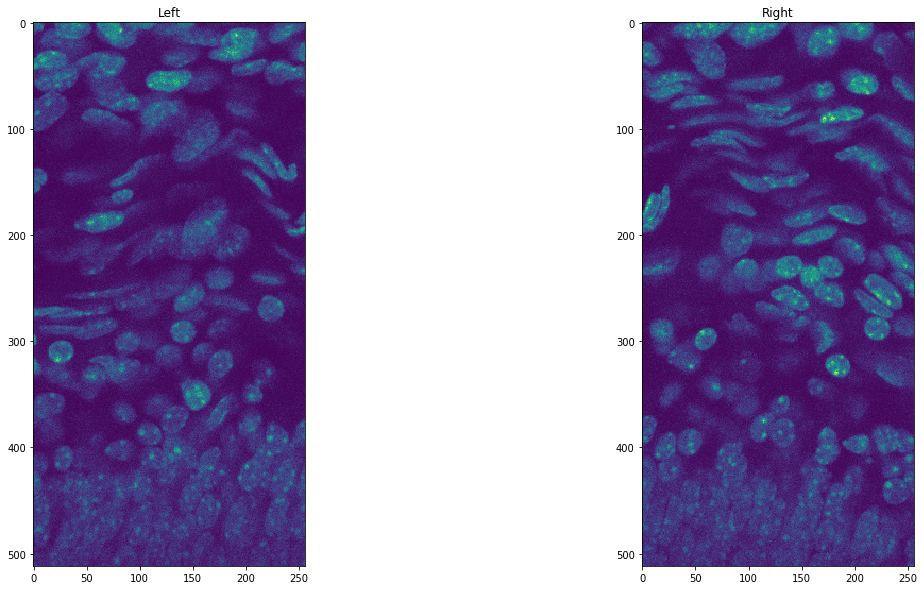

In [7]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(data[0,:,:256,0])
plt.title('Left')

plt.subplot(1,2,2)
plt.imshow(data[0,:,256:,0])
plt.title('Right')

plt.show()

# We now crop away the left portion of the data since this portion will be used later for testing
data = data[:, :, 256:, :]

### Create the Network and Train it
This can take a while.

In [8]:
# The CARE network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix=nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=5, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3, supervised=True)

../../../unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
../../../unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)
/home/lalit/Desktop/01_Softwares/anaconda3/envs/ppn2vEnv/lib/python3.7/site-packages/torch/cuda/__init__.py:118: UserWarning: 
    Found GPU1 NVS 310 which is of cuda capability 2.1.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


Epoch 0 finished      
avg. loss: 0.37972649857401847+-(2SEM)0.07299351209604539      
Epoch 1 finished      
avg. loss: 0.09611939340829849+-(2SEM)0.009451076661529658      
Epoch 2 finished      
avg. loss: 0.06781910136342048+-(2SEM)0.008327710031599628      
Epoch 3 finished      
avg. loss: 0.03959759073331952+-(2SEM)0.007083354889915037      
Epoch 4 finished      
avg. loss: 0.04121070979163051+-(2SEM)0.009361354457571365      
Epoch 5 finished      
avg. loss: 0.038230837974697354+-(2SEM)0.0051336483852324494      
Epoch 6 finished      
avg. loss: 0.028728505689650775+-(2SEM)0.004375891491713381      
Epoch 7 finished      
avg. loss: 0.027897504344582557+-(2SEM)0.0033909064918579363      
Epoch 8 finished      
avg. loss: 0.026720834570005535+-(2SEM)0.004793407643351936      
Epoch 9 finished      
avg. loss: 0.02545341197401285+-(2SEM)0.003298994292537097      
Epoch 10 finished      
avg. loss: 0.021461191913113+-(2SEM)0.003298348992436203      
Epoch 11 finished      
avg.

Epoch 90 finished      
avg. loss: 0.014619823731482028+-(2SEM)0.0017739360685890492      
Epoch 91 finished      
avg. loss: 0.014758490910753607+-(2SEM)0.0020709860954651335      
Epoch 92 finished      
avg. loss: 0.015624666307121515+-(2SEM)0.002246407130378272      
Epoch 93 finished      
avg. loss: 0.014769369503483176+-(2SEM)0.0025373424957812695      
Epoch    93: reducing learning rate of group 0 to 1.2500e-04.
Epoch 94 finished      
avg. loss: 0.01639996888116002+-(2SEM)0.0024272173096785594      
Epoch 95 finished      
avg. loss: 0.013048809207975864+-(2SEM)0.0015331222033203083      
Epoch 96 finished      
avg. loss: 0.014178624050691724+-(2SEM)0.0017577639734518953      
Epoch 97 finished      
avg. loss: 0.012872400414198636+-(2SEM)0.001730003886190196      
Epoch 98 finished      
avg. loss: 0.016072334721684456+-(2SEM)0.0023017217652594834      
Epoch 99 finished      
avg. loss: 0.014165133866481484+-(2SEM)0.002371537428083934      
Epoch 100 finished      
avg. lo

Epoch 175 finished      
avg. loss: 0.014623046480119228+-(2SEM)0.0026920206798789243      
Epoch 176 finished      
avg. loss: 0.015372938336804509+-(2SEM)0.0018892276511422018      
Epoch 177 finished      
avg. loss: 0.015160127310082316+-(2SEM)0.0021835389301574615      
Epoch 178 finished      
avg. loss: 0.016748640034347773+-(2SEM)0.002168623970015162      
Epoch 179 finished      
avg. loss: 0.01566430050879717+-(2SEM)0.0024127249133243946      
Epoch 180 finished      
avg. loss: 0.014386116387322545+-(2SEM)0.0009432503215360565      
Epoch 181 finished      
avg. loss: 0.015430530929006637+-(2SEM)0.002617426623580741      
Epoch   181: reducing learning rate of group 0 to 4.8828e-07.
Epoch 182 finished      
avg. loss: 0.013942901929840445+-(2SEM)0.0015639213817073964      
Epoch 183 finished      
avg. loss: 0.014642155496403575+-(2SEM)0.0022273152705629055      
Epoch 184 finished      
avg. loss: 0.01316875540651381+-(2SEM)0.002004900270016397      
Epoch 185 finished     

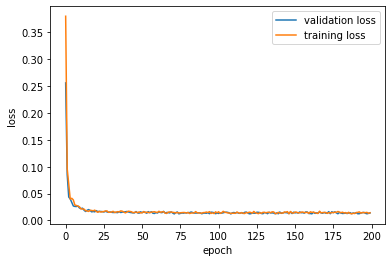

In [10]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()